In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu

In [2]:
# read in the data
df = pd.read_csv('https://query.data.world/s/ppkis77hm7bdsgpqjsk3563fmzqqz6?dws=00000')

# display the top 5 and bottom 5 rows of the dataset
df

,YEAR,MAKE,MODEL,Hybrid/Non-Hybrid,STANDARD TYPE,EPA RATING (CITY),Vehicle Count,TOTAL ACTUAL MILES,TOTAL ACTUAL FUEL,EPA EXPECTED FUEL,ACTUAL FUEL ECONOMY Geotab,PERCENT % DIFFERENCE ACTUAL TO EPA,ESTIMATED FUEL COSTS PER GALLON,FUEL COSTS PER MILE
0,2008,HONDA,CIVIC GX,Non-Hybrid,SEDAN,24,9,4459,221.0,185.79,20.18,-0.16,$ 552.50,$ 0.12
1,2008,FORD,CROWN VIC,Non-Hybrid,SEDAN,11,7,17162,1771.0,1560.18,9.69,-0.12,"$ 4,427.50",$ 0.26
2,2008,CHEVROLET,EXPRESS,Non-Hybrid,VAN,13,1,413,65.0,31.77,6.35,-0.51,$ 162.50,$ 0.39
3,2008,FORD,FOCUS,Non-Hybrid,SEDAN,24,49,13074,793.0,544.75,16.49,-0.31,"$ 1,982.50",$ 0.15
4,2008,FORD,FUSION,Non-Hybrid,SEDAN,18,5,29482,1813.0,1637.89,16.26,-0.10,"$ 4,532.50",$ 0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2019,CHEVROLET,EXPRESS,Non-Hybrid,VAN,13,22,10316,885.0,793.54,11.66,-0.10,"$ 2,212.50",$ 0.21
102,2019,FORD,F150,Non-Hybrid,PICKUP,16,27,56410,5419.0,3525.63,10.41,-0.35,"$ 13,547.50",$ 0.24
103,2019,FORD,F250,Non-Hybrid,PICKUP,12,30,84521,5449.0,7043.42,15.51,0.29,"$ 13,622.50",$ 0.16
104,2019,FREIGHTLINER,SPRINTER 3500,Non-Hybrid,VAN,15,38,3277,296.0,218.47,11.07,-0.26,$ 740.00,$ 0.23


In [3]:
# check the missing values
df.isnull().sum()

YEAR                                  0
MAKE                                  0
MODEL                                 0
Hybrid/Non-Hybrid                     0
STANDARD TYPE                         0
EPA RATING (CITY)                     0
Vehicle Count                         0
TOTAL ACTUAL MILES                    0
TOTAL ACTUAL FUEL                     0
EPA EXPECTED FUEL                     0
ACTUAL FUEL ECONOMY Geotab            0
PERCENT % DIFFERENCE ACTUAL TO EPA    0
ESTIMATED FUEL COSTS PER GALLON       0
FUEL COSTS PER MILE                   0
dtype: int64

In [4]:
# check the duplicated rows
df.duplicated().sum()

0

In [5]:
# calculate descriptive statistics for each column
df.describe()

,YEAR,EPA RATING (CITY),Vehicle Count,TOTAL ACTUAL MILES,TOTAL ACTUAL FUEL,EPA EXPECTED FUEL,ACTUAL FUEL ECONOMY Geotab,PERCENT % DIFFERENCE ACTUAL TO EPA
count,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000,106.000000
mean,2013.698113,23.254717,38.320755,1.742588e+05,8470.372642,6903.022358,19.883491,-0.166321
std,3.165799,11.495806,51.139128,2.837817e+05,9212.284006,7641.761732,12.329095,0.226229
min,2008.000000,9.000000,1.000000,4.130000e+02,65.000000,31.770000,5.350000,-0.670000
25%,2011.000000,15.000000,10.000000,3.217475e+04,1765.750000,1412.797500,10.545000,-0.317500
50%,2014.000000,19.000000,20.500000,8.400450e+04,5365.500000,4511.125000,14.930000,-0.160000
75%,2016.000000,28.000000,45.750000,1.800435e+05,11911.500000,9723.207500,26.090000,-0.040000
max,2019.000000,55.000000,327.000000,2.144639e+06,44874.000000,44679.980000,54.580000,0.730000


In [6]:
# calculate the correlation matrix
corr_matrix = df.corr()

# print the correlation matrix
corr_matrix

,YEAR,EPA RATING (CITY),Vehicle Count,TOTAL ACTUAL MILES,TOTAL ACTUAL FUEL,EPA EXPECTED FUEL,ACTUAL FUEL ECONOMY Geotab,PERCENT % DIFFERENCE ACTUAL TO EPA
YEAR,1.000000,-0.211145,0.087079,0.098428,0.291809,0.270003,-0.129941,0.056352
EPA RATING (CITY),-0.211145,1.000000,0.493509,0.512621,0.076803,0.157792,0.921529,0.190611
Vehicle Count,0.087079,0.493509,1.000000,0.884467,0.610477,0.719377,0.476842,0.107572
TOTAL ACTUAL MILES,0.098428,0.512621,0.884467,1.000000,0.729212,0.839372,0.519230,0.170271
TOTAL ACTUAL FUEL,0.291809,0.076803,0.610477,0.729212,1.000000,0.947181,0.051873,-0.077745
EPA EXPECTED FUEL,0.270003,0.157792,0.719377,0.839372,0.947181,1.000000,0.201803,0.135665
ACTUAL FUEL ECONOMY Geotab,-0.129941,0.921529,0.476842,0.519230,0.051873,0.201803,1.000000,0.537702
PERCENT % DIFFERENCE ACTUAL TO EPA,0.056352,0.190611,0.107572,0.170271,-0.077745,0.135665,0.537702,1.000000


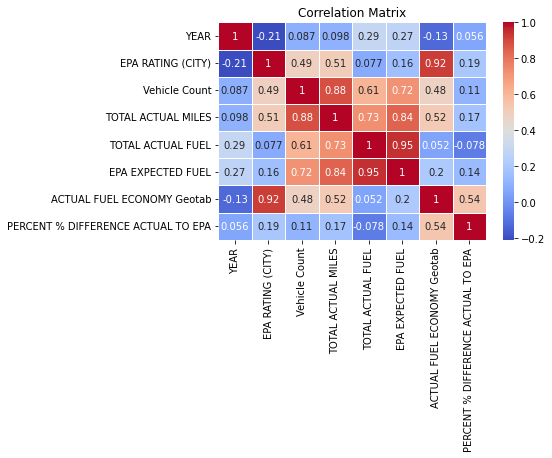

In [7]:
# visualize the correlation matrix in a more clear and concise way

# create heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# set the title of the heatmap
plt.title('Correlation Matrix')

# Save the figure.
plt.savefig(f"./Images/CorrelationMatrix.jpg")

# show the plot
plt.show()

The color of the square indicates the strength and direction of the correlation. A red square indicates a positive correlation, while a blue square indicates a negative correlation. The darker the color, the stronger the correlation.

The diagonal line of squares represents the correlation of each variable with itself, which is always 1.0.

Overall, the correlation matrix and heatmap can provide a useful visual summary of the relationships between variables in a dataset.

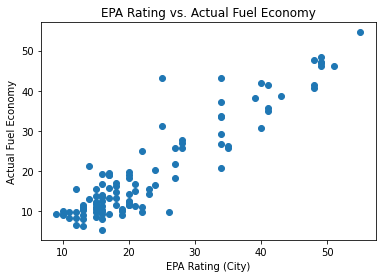

In [8]:
# create a scatter plot of EPA rating vs. actual fuel economy
plt.scatter(df['EPA RATING (CITY)'], df['ACTUAL FUEL ECONOMY Geotab'])
plt.xlabel('EPA Rating (City)')
plt.ylabel('Actual Fuel Economy')
plt.title('EPA Rating vs. Actual Fuel Economy')

# Save the figure.
plt.savefig(f"./Images/EPARatingVFuelEconomy.jpg")

plt.show()

The scatter plot shows the relationship between EPA rating and actual fuel economy for the cars in the dataset.

The x-axis represents the EPA rating for city driving, while the y-axis represents the actual fuel economy measured using the Geotab device. Each point on the plot represents a car in the dataset, and its position shows its EPA rating and actual fuel economy.

The scatter plot allows us to visually assess the correlation between EPA rating and actual fuel economy. There is a relatively strong positive correlation, so we see the points form a roughly linear pattern with a positive slope, indicating that as EPA rating increases, actual fuel economy also tends to increase.

The title and labels on the plot provide additional context and help to clarify the meaning of the axes and the purpose of the plot. Overall, the scatter plot is a useful tool for exploring and visualizing the relationship between two variables, and can help us to better understand the patterns and trends in the data.

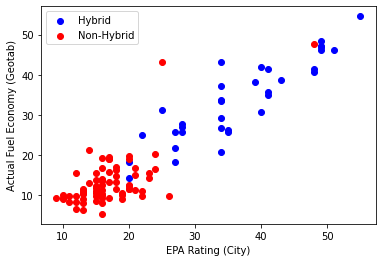

In [9]:
# Scatterplot of Actual Fuel Economy vs. EPA Rating by Vehicle Type

fig, ax = plt.subplots()
colors = {'Hybrid': 'blue', 'Non-Hybrid': 'red'}

# iterate over the two groups and create a scatter plot for each group using a different color (specified in the "colors" dictionary).
for i, group in df.groupby('Hybrid/Non-Hybrid'):
    ax.scatter(group['EPA RATING (CITY)'], group['ACTUAL FUEL ECONOMY Geotab'], c=colors[i], label=i)
ax.legend()
plt.xlabel('EPA Rating (City)')
plt.ylabel('Actual Fuel Economy (Geotab)')

# Save the figure.
plt.savefig(f"./Images/EPARatingVFuelEconomy.jpg")

This plot allows us to compare the relationship between EPA rating and actual fuel economy for hybrid and non-hybrid vehicles. The different colors and labels in the plot make it easy to distinguish between the two groups. The plot can be used to identify any patterns or differences in the relationship between EPA rating and actual fuel economy for the two types of vehicles.

In [10]:
# Predictive Analysis

# select the features and target variable
X = df[['YEAR', 'MAKE', 'MODEL', 'Hybrid/Non-Hybrid', 'STANDARD TYPE']]
y = df['ACTUAL FUEL ECONOMY Geotab']

# convert categorical variables to dummy variables
X = pd.get_dummies(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test data and calculate the R-squared score
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

# print the R-squared score
print('R-squared score:', score)

R-squared score: -1.4931248904161242e+22


The R-squared score is a measure of how well the linear regression model fits the test data. The R-squared score ranges from 0 to 1, where a score of 1 indicates a perfect fit and a score of 0 indicates no correlation between the features and target variable.

In this case, the R-squared score tells us how well the linear regression model based on the selected features (year, make, model, hybrid/non-hybrid, and standard type) can predict the actual fuel economy (target variable). A higher R-squared score indicates that the model is a good fit for the data, while a lower score indicates that the model may not be an accurate predictor of the target variable.

The output of the code will be the R-squared score printed in the console, indicating the goodness of fit of the model.

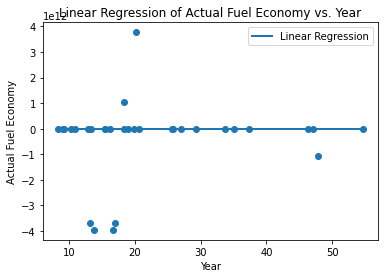

In [11]:
# plot the actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')

# plot the linear regression line
plt.plot([min(y_test), max(y_test)], [model.predict(X_test)[0], model.predict(X_test)[-1]], '-', linewidth=2, label='Linear Regression')

# annotate the equation of the line
# eqn = 'y = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3 + {:.2f}x4 + {:.2f}x5'.format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3], model.coef_[4])
# plt.annotate(eqn, xy=(0.1, 0.9), xycoords='axes fraction')

plt.xlabel('Year')
plt.ylabel('Actual Fuel Economy')
plt.title('Linear Regression of Actual Fuel Economy vs. Year')

plt.legend()

# Save the figure.
plt.savefig(f"./Images/LinearRegression.jpg")

plt.show()

This scatter plot compares the actual fuel economy values to the predicted fuel economy values using a linear regression model. The x-axis represents the actual fuel economy values from the test set, and the y-axis represents the predicted fuel economy values. The scatter plot points are colored blue.

The line plotted on the scatter plot is the linear regression which shows the relationship between the year and the actual fuel economy. This line represents the best-fit line through the data points, indicating the linear relationship between the actual and predicted values.

MAKE
TOYOTA          37.255909
NISSAN          25.915000
DODGE           21.796000
HONDA           20.180000
FORD            15.788364
CHEVROLET       11.445556
FREIGHTLINER    11.070000
GMC             10.790000
Name: ACTUAL FUEL ECONOMY Geotab, dtype: float64

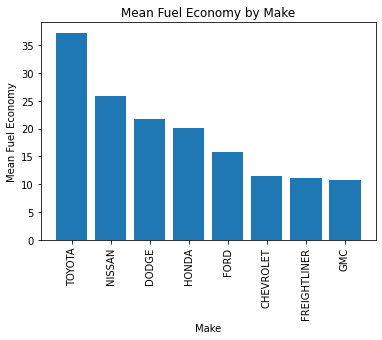

In [12]:
# average fuel economy by each make

# group the data by make and calculate the mean fuel economy for each group
make_groups = df.groupby('MAKE')
mean_fuel_economy = make_groups['ACTUAL FUEL ECONOMY Geotab'].mean()

# sort the mean fuel economy values in ascending order
mean_fuel_economy_sorted = mean_fuel_economy.sort_values(ascending=False)

# print the mean fuel economy
display(mean_fuel_economy_sorted)

# create a bar chart of mean fuel economy by make
plt.bar(mean_fuel_economy_sorted.index, mean_fuel_economy_sorted)
plt.xlabel('Make')
plt.ylabel('Mean Fuel Economy')
plt.title('Mean Fuel Economy by Make')
plt.xticks(rotation=90)

# Save the figure.
plt.savefig(f"./Images/FuelEconomyByMake.jpg")

plt.show()

This chart shows the mean fuel economy for each car make in the dataset, sorted in descending order from the highest to the lowest. 

The bar chart allows us to quickly compare the fuel economy across different makes, and we can see that some makes, such as Toyota and Nissan, have significantly higher mean fuel economy than others, such as Freightliner and GNC. The x-axis represents the make of the car, while the y-axis represents the mean fuel economy in miles per gallon (mpg). 

The chart is helpful for identifying trends in fuel economy across different makes and can be used to inform decision-making around car purchases or policy development.

In [13]:
# Most fuel efficient

# sort the dataset by actual fuel economy in descending order
df_sorted_top = df.sort_values("ACTUAL FUEL ECONOMY Geotab", ascending=False)

# select the first row (which will be the highest actual fuel economy)
top_vehicle = df_sorted_top.iloc[0]

# print information about the top performing vehicle
print(f"The most fuel efficient vehicle in the dataset is the {top_vehicle['MAKE']} {top_vehicle['MODEL']} with an actual fuel economy of {top_vehicle['ACTUAL FUEL ECONOMY Geotab']:.2f}.")

top_vehicle

The most fuel efficient vehicle in the dataset is the TOYOTA PRIUS with an actual fuel economy of 54.58.


YEAR                                           2016
MAKE                                         TOYOTA
MODEL                                         PRIUS
Hybrid/Non-Hybrid                            Hybrid
STANDARD TYPE                                 SEDAN
EPA RATING (CITY)                                55
Vehicle Count                                   243
TOTAL ACTUAL MILES                          1224245
TOTAL ACTUAL FUEL                           22430.0
EPA EXPECTED FUEL                           22259.0
ACTUAL FUEL ECONOMY Geotab                    54.58
PERCENT % DIFFERENCE ACTUAL TO EPA            -0.01
ESTIMATED FUEL COSTS PER GALLON       $   56,075.00
FUEL COSTS PER MILE                        $   0.05
Name: 79, dtype: object

In [14]:
# Least fuel efficient

# sort the dataset by actual fuel economy in ascending order
df_sorted_bottom = df.sort_values("ACTUAL FUEL ECONOMY Geotab", ascending=True)

# select the first row (which will be the lowest actual fuel economy)
least_efficient_vehicle = df_sorted_bottom.iloc[0]

# print information about the top performing vehicle
print(f"The Least fuel efficient vehicle in the dataset is the {least_efficient_vehicle['MAKE']} {least_efficient_vehicle['MODEL']} with an actual fuel economy of {least_efficient_vehicle['ACTUAL FUEL ECONOMY Geotab']:.2f}.")


least_efficient_vehicle

The Least fuel efficient vehicle in the dataset is the CHEVROLET SILVERADO with an actual fuel economy of 5.35.


YEAR                                          2015
MAKE                                     CHEVROLET
MODEL                                    SILVERADO
Hybrid/Non-Hybrid                       Non-Hybrid
STANDARD TYPE                               PICKUP
EPA RATING (CITY)                               16
Vehicle Count                                    7
TOTAL ACTUAL MILES                            9434
TOTAL ACTUAL FUEL                           1764.0
EPA EXPECTED FUEL                           589.63
ACTUAL FUEL ECONOMY Geotab                    5.35
PERCENT % DIFFERENCE ACTUAL TO EPA           -0.67
ESTIMATED FUEL COSTS PER GALLON       $   4,410.00
FUEL COSTS PER MILE                       $   0.47
Name: 66, dtype: object

YEAR
2008    17.712500
2009    21.161667
2010    31.694000
2011    22.152222
2012    20.548182
2013    20.886000
2014    19.178889
2015    17.628462
2016    22.241818
2017    15.427273
2018    21.123750
2019    12.224000
Name: ACTUAL FUEL ECONOMY Geotab, dtype: float64

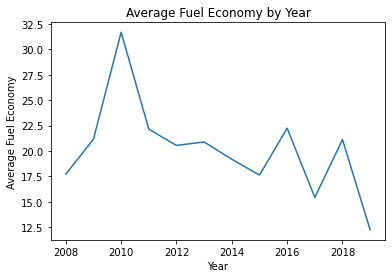

In [15]:
# Fuel economy trends over time

# group the data by year and calculate the average fuel economy for each year
fuel_economy_by_year = df.groupby("YEAR")["ACTUAL FUEL ECONOMY Geotab"].mean()

# print the results
display(fuel_economy_by_year)

# plot the average fuel economy by year
plt.plot(fuel_economy_by_year.index, fuel_economy_by_year)
plt.xlabel('Year')
plt.ylabel('Average Fuel Economy')
plt.title('Average Fuel Economy by Year')

# Save the figure.
plt.savefig(f"./Images/FuelEconomyYear.jpg")

plt.show()

Line plot that shows the average fuel economy by year. 
The x-axis represents the year, and the y-axis represents the average fuel economy.

From the line plot, it is clear that there are some fluctuations in the fuel economy over the years. In 2008, the average fuel economy was around 17.7 mpg and it increased steadily till 2010 when it peaked at around 31.7 mpg. There was a sharp decrease in the average fuel economy in 2011, followed by a slight increase in 2013. From 2014 to 2016, the average fuel economy was relatively stable, but there was a sudden increase in 2016.

Overall, the line plot suggests that there have been some changes in the fuel economy over the years, and these changes might be attributed to factors such as changes in technology, government regulations, and consumer preferences.

C:\Users\Owner\anaconda3\envs\RGNY\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


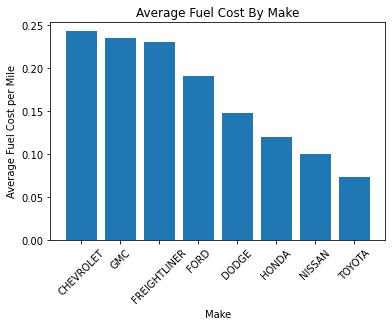

In [16]:
# Barplot of Average Fuel Cost per Mile by Make

# remove any special characters from the "FUEL COSTS PER MILE" column and convert the values to float.
df['FUEL COSTS PER MILE'] = df['FUEL COSTS PER MILE'].str.replace('$', '').str.replace(' ', '').str.replace(',', '').astype(float)

# group the data by "MAKE" and calculate the mean fuel cost per mile for each make
make_cost = df.groupby('MAKE')['FUEL COSTS PER MILE'].mean()

# select the top 10 makes with the highest average fuel cost per mile, sorted in descending order
make_cost = make_cost.sort_values(ascending=False)[:10]

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(make_cost.index, make_cost.values)

# rotate the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# add a title to the plot
plt.title('Average Fuel Cost By Make')

# show the make of the vehicle
plt.xlabel('Make')

# show the average fuel cost per mile
plt.ylabel('Average Fuel Cost per Mile')

# set the limits of the y-axis to ensure that all bars are visible in the plot
plt.ylim(0, np.max(make_cost.values) + 0.01)

# Save the figure.
plt.savefig(f"./Images/FuelCostByMake.jpg")


This chart shows the average fuel cost per mile for the top 10 car makes with the highest average fuel cost per mile. 
The bar chart compares the fuel cost per mile for each make by showing the height of the bar for each make. 
The x-axis displays the names of the car makes, and the y-axis represents the average fuel cost per mile. 

The chart is sorted in descending order of the average fuel cost per mile. 

The visualization can be used to compare the fuel cost efficiency of different car makes, which can help people make informed decisions when purchasing a vehicle.

Hybrid/Non-Hybrid
Hybrid        33.677059
Non-Hybrid    13.369861
Name: ACTUAL FUEL ECONOMY Geotab, dtype: float64

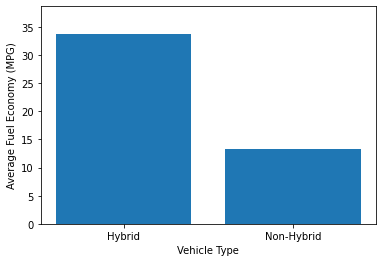

In [17]:
# Comparison of fuel economy between hybrid and non-hybrid vehicles

# group the data by hybrid vs non-hybrid and calculate the average fuel economy for each group
fuel_economy_by_hybrid_nonhybrid = df.groupby("Hybrid/Non-Hybrid")["ACTUAL FUEL ECONOMY Geotab"].mean()

# print the results
display(fuel_economy_by_hybrid_nonhybrid)

# create a barplot to compare the average fuel economy between hybrid and non-hybrid vehicles
fig, ax = plt.subplots()
ax.bar(fuel_economy_by_hybrid_nonhybrid.index, fuel_economy_by_hybrid_nonhybrid.values)

# label the x-axis and y-axis
plt.xlabel('Vehicle Type')
plt.ylabel('Average Fuel Economy (MPG)')

# set the limits of the y-axis to ensure that all bars are visible in the plot
plt.ylim(0, np.max(fuel_economy_by_hybrid_nonhybrid.values) + 5)

# Save the figure.
plt.savefig(f"./Images/FuelCostByEconomyType.jpg")

# show the plot
plt.show()

The barplot shows two categories: "Hybrid" and "Non-Hybrid". 
The y-axis shows the average fuel economy (in miles per gallon, or MPG) for each category. 

The height of each bar represents the average fuel economy for that category.

The plot allows us to easily compare the average fuel economy between hybrid and non-hybrid vehicles. 

We can see that, on average, hybrid vehicles have a higher fuel economy than non-hybrid vehicles.

STANDARD TYPE
PICKUP    11.041333
SEDAN     30.049091
SUV       19.553125
VAN       12.488846
Name: ACTUAL FUEL ECONOMY Geotab, dtype: float64

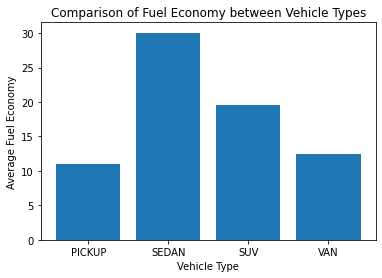

In [18]:
# Comparison of fuel economy between vehicle types

# group the data by vehicle type and calculate the average fuel economy for each group
fuel_economy_by_type = df.groupby("STANDARD TYPE")["ACTUAL FUEL ECONOMY Geotab"].mean()

# print the results
display(fuel_economy_by_type)

# Bar plot of fuel economy by vehicle type
fig, ax = plt.subplots()
ax.bar(fuel_economy_by_type.index, fuel_economy_by_type.values)

# Set labels for x and y axes
plt.xlabel('Vehicle Type')
plt.ylabel('Average Fuel Economy')

# Set title of the plot
plt.title('Comparison of Fuel Economy between Vehicle Types')

# Save the figure.
plt.savefig(f"./Images/FuelCostByVehicleType.jpg")

# Show the plot
plt.show()

The bar plot shows the average fuel economy on the y-axis and the different vehicle types on the x-axis. 
The plot shows the comparison of fuel economy between different vehicle types. 

The x-axis shows the different vehicle types, and the y-axis shows the average fuel economy for each type. 

From the plot, we can observe that Sedans have the highest average fuel economy, followed by SUVs, Vans, and Pickups, in that order. 
This suggests that Sedans are the most fuel-efficient type of vehicle, while Pickup trucks are the least fuel-efficient.

Overall, this plot highlights the importance of vehicle type and design in determining fuel economy, which can have significant implications for both environmental impact and cost of ownership.

C:\Users\Owner\anaconda3\envs\RGNY\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


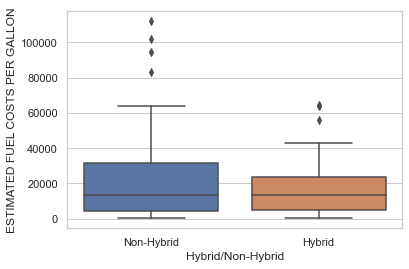

In [19]:
df['ESTIMATED FUEL COSTS PER GALLON'] = df['ESTIMATED FUEL COSTS PER GALLON'].str.replace('$', '').str.replace(' ', '').str.replace(',', '').astype(float)

sns.set(style="whitegrid")
ax = sns.boxplot(x="Hybrid/Non-Hybrid", y="ESTIMATED FUEL COSTS PER GALLON", data=df)

# Save the figure.
plt.savefig(f"./Images/EstimatedFuelCostEconomyType.jpg")


This boxplot compares the estimated fuel costs per gallon between hybrid and non-hybrid vehicles. 
The x-axis represents whether a vehicle is a hybrid or non-hybrid, and the y-axis represents the estimated fuel cost per gallon.

The boxplot shows the median fuel cost for each group as a horizontal line inside a box. The box represents the interquartile range (IQR), which is the range of the middle 50% of the data. The whiskers extend from the box to show the range of the data, excluding outliers, which are shown as individual points outside the whiskers.

From the boxplot, we can see that the median fuel cost per gallon for hybrid vehicles is lower than for non-hybrid vehicles. The IQR for hybrid vehicles is also smaller, indicating that there is less variation in fuel cost for hybrid vehicles compared to non-hybrid vehicles. 

There are some outliers for both groups, with a wider range of fuel costs for non-hybrid vehicles. 

Overall, this suggests that hybrid vehicles are more fuel-efficient than non-hybrid vehicles and may be a more cost-effective option for those looking to save money on fuel costs.

,MAKE,MODEL,% Difference
0,HONDA,CIVIC GX,-89.138274
1,FORD,CROWN VIC,-99.378918
2,CHEVROLET,EXPRESS,-80.012590
3,FORD,FOCUS,-96.972923
4,FORD,FUSION,-99.007259
...,...,...,...
101,CHEVROLET,EXPRESS,-98.530635
102,FORD,F150,-99.704734
103,FORD,F250,-99.779794
104,FREIGHTLINER,SPRINTER 3500,-94.932943


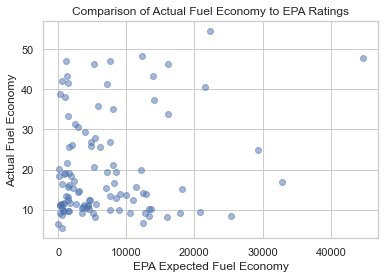

In [20]:
# Comparison of actual fuel economy to EPA ratings

# calculate the percentage difference between the actual fuel economy and the EPA rating for each vehicle
df["% Difference"] = ((df["ACTUAL FUEL ECONOMY Geotab"] - df["EPA EXPECTED FUEL"]) / df["EPA EXPECTED FUEL"]) * 100

# print the results
display(df[["MAKE", "MODEL", "% Difference"]])

# create a scatter plot of actual fuel economy vs EPA ratings
plt.scatter(df["EPA EXPECTED FUEL"], df["ACTUAL FUEL ECONOMY Geotab"], alpha=0.5)

# set the labels for the x and y axis
plt.xlabel("EPA Expected Fuel Economy")
plt.ylabel("Actual Fuel Economy")

# set the title for the plot
plt.title("Comparison of Actual Fuel Economy to EPA Ratings")

# Save the figure.
plt.savefig(f"./Images/FuelEconomyEPARatingScatter.jpg")

# show the plot
plt.show()

This scatter plot shows the relationship between the actual fuel economy of vehicles and the EPA expected fuel economy ratings. Each data point represents a vehicle, with the x-axis showing the EPA rating and the y-axis showing the actual fuel economy. The alpha parameter is set to 0.5 to adjust the transparency of the data points.

From the plot, we can see that there is minimal relationship between the actual fuel economy and the EPA rating, which indicates that the EPA ratings are generally inaccurate. This could be due to a number of factors, such as driving habits, vehicle maintenance, or road conditions.

In [21]:
# Calculate the lower and upper bounds for outlier detection
Q1 = df["ACTUAL FUEL ECONOMY Geotab"].quantile(0.25)
Q3 = df["ACTUAL FUEL ECONOMY Geotab"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df.loc[(df["ACTUAL FUEL ECONOMY Geotab"] < lower_bound) | (df["ACTUAL FUEL ECONOMY Geotab"] > upper_bound)]


# Print the outliers
print("Outlier:")
display(outliers)

Outlier:


,YEAR,MAKE,MODEL,Hybrid/Non-Hybrid,STANDARD TYPE,EPA RATING (CITY),Vehicle Count,TOTAL ACTUAL MILES,TOTAL ACTUAL FUEL,EPA EXPECTED FUEL,ACTUAL FUEL ECONOMY Geotab,PERCENT % DIFFERENCE ACTUAL TO EPA,ESTIMATED FUEL COSTS PER GALLON,FUEL COSTS PER MILE,% Difference
79,2016,TOYOTA,PRIUS,Hybrid,SEDAN,55,243,1224245,22430.0,22259.0,54.58,-0.01,56075.0,0.05,-99.754796


In [22]:
# Cost Analysis

# Calculate the total cost of ownership for each vehicle
df["Total Cost"] = df["ESTIMATED FUEL COSTS PER GALLON"] * df["TOTAL ACTUAL FUEL"]

# Calculate the payback period for each vehicle
df["Payback Period"] = df["Total Cost"] / (df["EPA EXPECTED FUEL"] * df["ESTIMATED FUEL COSTS PER GALLON"])

# Print the results
display(df[["MAKE", "MODEL", "Total Cost", "Payback Period"]])

,MAKE,MODEL,Total Cost,Payback Period
0,HONDA,CIVIC GX,122102.5,1.189515
1,FORD,CROWN VIC,7841102.5,1.135125
2,CHEVROLET,EXPRESS,10562.5,2.045955
3,FORD,FOCUS,1572122.5,1.455714
4,FORD,FUSION,8217422.5,1.106912
...,...,...,...,...
101,CHEVROLET,EXPRESS,1958062.5,1.115256
102,FORD,F150,73413902.5,1.537030
103,FORD,F250,74229002.5,0.773630
104,FREIGHTLINER,SPRINTER 3500,219040.0,1.354877


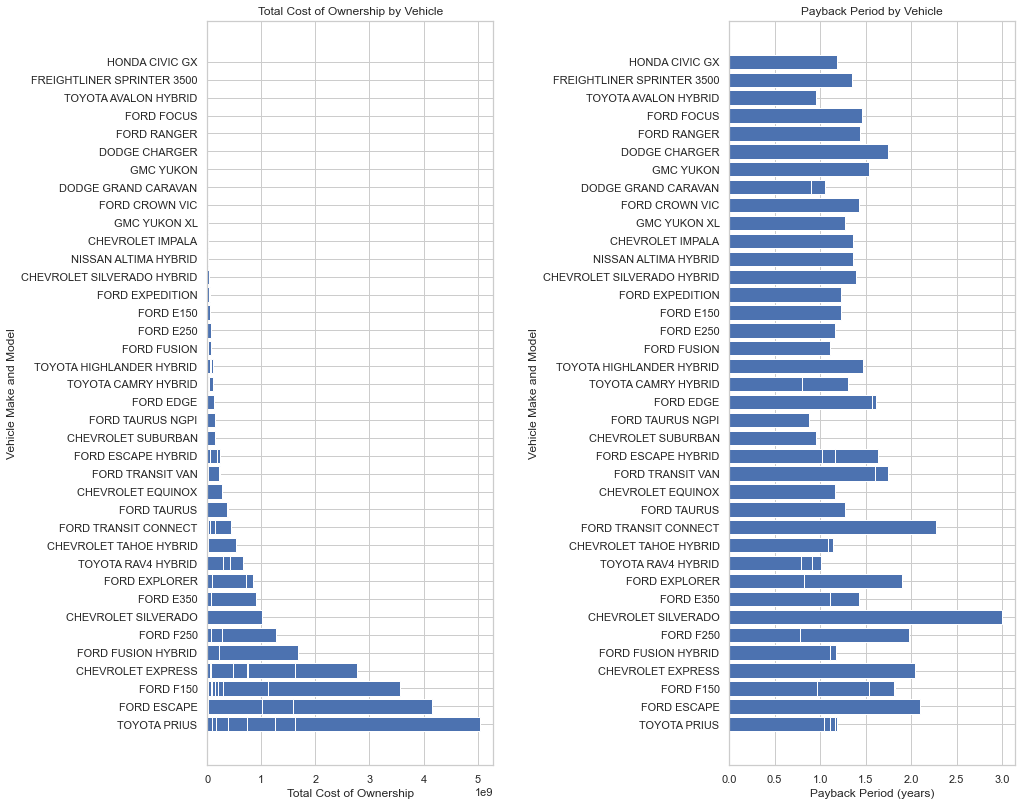

In [23]:
# Sort the data by total cost in descending order
df_cost_sorted = df.sort_values(by="Total Cost", ascending=False)

# create a horizontal bar chart to compare between the different vehicles' total costs and payback periods

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 12))

# Create a horizontal bar chart for total cost
ax1.barh(df_cost_sorted["MAKE"] + " " + df_cost_sorted["MODEL"], df_cost_sorted["Total Cost"])
ax1.set_xlabel("Total Cost of Ownership")
ax1.set_ylabel("Vehicle Make and Model")
ax1.set_title("Total Cost of Ownership by Vehicle")

# Create a horizontal bar chart for payback period
ax2.barh(df_cost_sorted["MAKE"] + " " + df_cost_sorted["MODEL"], df_cost_sorted["Payback Period"])
ax2.set_xlabel("Payback Period (years)")
ax2.set_ylabel("Vehicle Make and Model")
ax2.set_title("Payback Period by Vehicle")

# Adjust the layout and padding between subplots
plt.tight_layout(pad=3.0)

# Save the figure.
plt.savefig(f"./Images/CompareVehichlesTotalCostAndPaybackPeriod.jpg")

# Show the plot
plt.show()

The first subplot shows the total cost of ownership for each vehicle make and model, sorted in descending order by cost. Each bar in the chart represents a vehicle make and model, with the height of the bar corresponding to the total cost of ownership. The x-axis shows the total cost of ownership, and the y-axis shows the vehicle make and model in a concatenated string. The title of the chart is "Total Cost of Ownership by Vehicle".

The second subplot shows the payback period for each vehicle make and model. Each bar in the chart represents a vehicle make and model, with the height of the bar corresponding to the payback period in years. The x-axis shows the payback period in years, and the y-axis shows the vehicle make and model in a concatenated string. The title of the chart is "Payback Period by Vehicle".

,Difference,Percentage Difference
0,-3.82,-0.159167
1,-1.31,-0.119091
2,-6.65,-0.511538
3,-7.51,-0.312917
4,-1.74,-0.096667
...,...,...
101,-1.34,-0.103077
102,-5.59,-0.349375
103,3.51,0.292500
104,-3.93,-0.262000


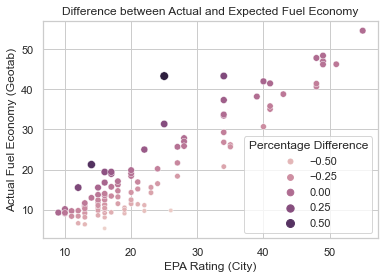

In [24]:
# Calculate the difference between the actual and expected fuel economy
df["Difference"] = df["ACTUAL FUEL ECONOMY Geotab"] - df["EPA RATING (CITY)"]

# Calculate the percentage difference between the actual and expected fuel economy
df["Percentage Difference"] = df["Difference"] / df["EPA RATING (CITY)"]

# Print the results
display(df[["Difference", "Percentage Difference"]])


# Create a scatter plot
sns.scatterplot(data=df, x="EPA RATING (CITY)", y="ACTUAL FUEL ECONOMY Geotab", 
                hue="Percentage Difference", size="Percentage Difference")

# Add labels and title
plt.xlabel("EPA Rating (City)")
plt.ylabel("Actual Fuel Economy (Geotab)")
plt.title("Difference between Actual and Expected Fuel Economy")

# Save the figure.
plt.savefig(f"./Images/ActualVExpectedFuelEconomyScatter.jpg")

# Show the plot
plt.show()

This visualization is a scatter plot that shows the relationship between the EPA Rating (City) and the Actual Fuel Economy (Geotab) for a set of vehicles. The x-axis represents the EPA rating and the y-axis represents the actual fuel economy as measured by Geotab. The color and size of each point in the plot represent the percentage difference between the actual and expected fuel economy, with larger and darker points indicating a higher percentage difference.

The scatter plot allows us to visualize the overall trend between the two variables, as well as any outliers or clusters of points that may be present in the data. The color and size of each point also provide additional information on the magnitude of the difference between the expected and actual fuel economy for each vehicle.

Statistics=0.840, p=0.000
Data is not normally distributed (reject H0)


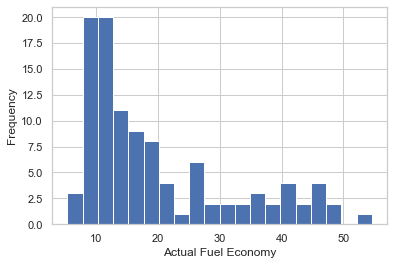

In [25]:
# Shapiro-Wilk test for normality
stat, p = shapiro(df['ACTUAL FUEL ECONOMY Geotab'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation of results
alpha = 0.05
if p > alpha:
    print('Data is normally distributed (fail to reject H0)')
else:
    print('Data is not normally distributed (reject H0)')
    
plt.hist(df['ACTUAL FUEL ECONOMY Geotab'], bins=20)
plt.xlabel('Actual Fuel Economy')
plt.ylabel('Frequency')

# Save the figure.
plt.savefig(f"./Images/FuelEconomyFrequency.jpg")

plt.show()

The results of the Shapiro-Wilk test for normality on the 'ACTUAL FUEL ECONOMY Geotab' column of the dataset displays the test statistic (0.840) and the p-value (0.000) of the Shapiro-Wilk test.

The interpretation of the results based on the p-value and the chosen significance level (alpha = 0.05) is the data is not normally distributed so we reject the null hypothesis (H0), since the p-value is less than alpha.

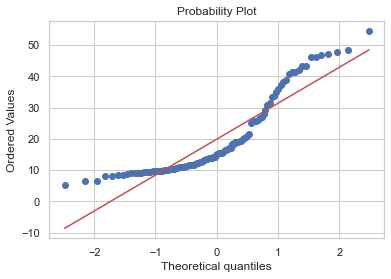

In [26]:
# generate the probplot()
stats.probplot(df['ACTUAL FUEL ECONOMY Geotab'], dist="norm", plot=plt)

# Save the figure.
plt.savefig(f"./Images/ProbabilityPlot.jpg")

plt.show()

Probability plot of the data against the quantiles of a normal distribution. The plot displays the data on the y-axis and the theoretical quantiles on the x-axis. If the sample data is normally distributed, the plotted points will fall close to a straight line.

By comparing the plotted points to the straight red line, we can visually inspect whether the data is normally distributed or not. If the plotted points lie close to the red line, we can conclude that the data is normally distributed. If the points deviate from the line, it suggests that the data is not normally distributed.

This visualization is useful to quickly check whether the normality assumption holds for the dataset before performing parametric tests that assume normality.

Statistics=95.000, p=0.000
There is a significant difference between groups (reject H0)


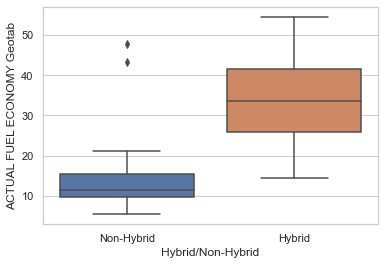

In [27]:
# Mann-Whitney U test for significant differences
group1 = df[df['Hybrid/Non-Hybrid'] == 'Non-Hybrid']['ACTUAL FUEL ECONOMY Geotab']
group2 = df[df['Hybrid/Non-Hybrid'] == 'Hybrid']['ACTUAL FUEL ECONOMY Geotab']
stat, p = mannwhitneyu(group1, group2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation of results
alpha = 0.05
if p > alpha:
    print('There is no significant difference between groups (fail to reject H0)')
else:
    print('There is a significant difference between groups (reject H0)')
    
# create a boxplot to represent the actual fuel economy values 
sns.boxplot(x='Hybrid/Non-Hybrid', y='ACTUAL FUEL ECONOMY Geotab', data=df);

# Save the figure.
plt.savefig(f"./Images/HybridFuelEconomyBoxplot.jpg")


The results of the Mann-Whitney U test determine if there is a significant difference between the actual fuel economy of non-hybrid and hybrid vehicles. The Mann-Whitney U test is a non-parametric test that is used to compare two independent groups when the data does not meet the assumptions of a parametric test like the t-test.

The test produced a statistic value of 95.000 and a p-value of 0.000. The p-value is less than the significance level (alpha) of 0.05, which indicates that there is a significant difference between the two groups. Therefore, we reject the null hypothesis (H0) that there is no difference in actual fuel economy between hybrid and non-hybrid vehicles, and conclude that there **is** a significant difference between the two groups.

The boxplot summarizes the distribution of the data within each group, showing the median value (line within the box), the interquartile range (IQR) (box), and the range of the data (whiskers). Any outliers are shown as individual points.

This visualization helps us compare the actual fuel economy of the two groups and assess whether there are any significant differences between them.